## Practice 3. 국가 군집화

데이터 셋: https://www.kaggle.com/datasets/ashydv/country-socioeconomic-data  
참고 자료: https://www.kaggle.com/code/ashydv/country-clustering-hierarchical-clustering-pca

각 국가별 사회적, 경제적 지표들이 들어있는 데이터 셋이 주어집니다.

- country: 국가 이름
- child_mort: 1000명당 5세 미만 아동 사망률
- exports: 상품 및 서비스 수출. 총 GDP 대비 백분율로 표시됨
- health: 총 건강 지출. 총 GDP 대비 백분율로 표시됨
- imports: 상품 및 서비스 수입. 총 GDP 대비 백분율로 표시됨
- Income: 개인 당 순소득
- Inflation: 총 GDP의 연간 성장률 측정
- life_expec: 현재 사망률 패턴이 지속된다고 할 때, 신생아의 평균 수명
- total_fer: 현재의 연령별 출산율이 유지된다고 할 때, 각 여성당 출산될 아이의 수
- gdpp: 1인당 GDP. 총 GDP를 총 인구로 나눈 값
- region_1: 지역 구분 1
- region_2: 지역 구분 2
- continent: 대륙

이 데이터를 활용하여 국가들을 군집화 하고 싶습니다. 계층적 군집 분석을 다양하게 활용해보세요. 대륙은 다르지만 같은 군집으로 분류되는 국가들은 어떤 특징을 가지고 있는지 분석해보세요. 

### 목표
- 국가의 전반적인 발전을 결정하는 사회 경제적 및 건강 요인을 사용하여 국가를 분류
- 그 후, 가장 중점을 두어야 할 국가를 제시

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("./data/countries.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Southern Asia,NaN,Asia,33.939110,67.709953
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,NaN,Europe,41.153332,20.168331
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,NaN,Africa,28.033886,1.659626
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Sub-Saharan Africa,Africa,-11.202692,17.873887
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Caribbean,Latin America and the Caribbean,North America,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Melanesia,NaN,Oceania,-15.376706,166.959158
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0,South America,Latin America and the Caribbean,South America,6.423750,-66.589730
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,South-eastern Asia,NaN,Asia,14.058324,108.277199
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,Western Asia,NaN,Asia,15.552727,48.516388


In [3]:
print(df["country"].values)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

In [4]:
df.isnull().sum()

country         0
child_mort      0
exports         0
health          0
imports         0
income          0
inflation       0
life_expec      0
total_fer       0
gdpp            0
region_1        0
region_2      101
continent       0
latitude        0
longitude       0
dtype: int64

In [5]:
df["region_2"].unique()

array([nan, 'Sub-Saharan Africa', 'Latin America and the Caribbean'],
      dtype=object)

In [6]:
df[df["continent"]=="Africa"]["region_1"].unique()

array(['Northern Africa', 'Middle Africa', 'Western Africa',
       'Southern Africa', 'Eastern Africa'], dtype=object)

In [7]:
df[df["region_2"]=='Sub-Saharan Africa']["region_1"].unique()

array(['Middle Africa', 'Western Africa', 'Southern Africa',
       'Eastern Africa'], dtype=object)

In [8]:
df[df["region_2"]=='Latin America and the Caribbean']["region_1"].unique()

array(['Caribbean', 'South America', 'Central America'], dtype=object)

In [4]:
ratio_df = df[['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']]

/Users/oyujeong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


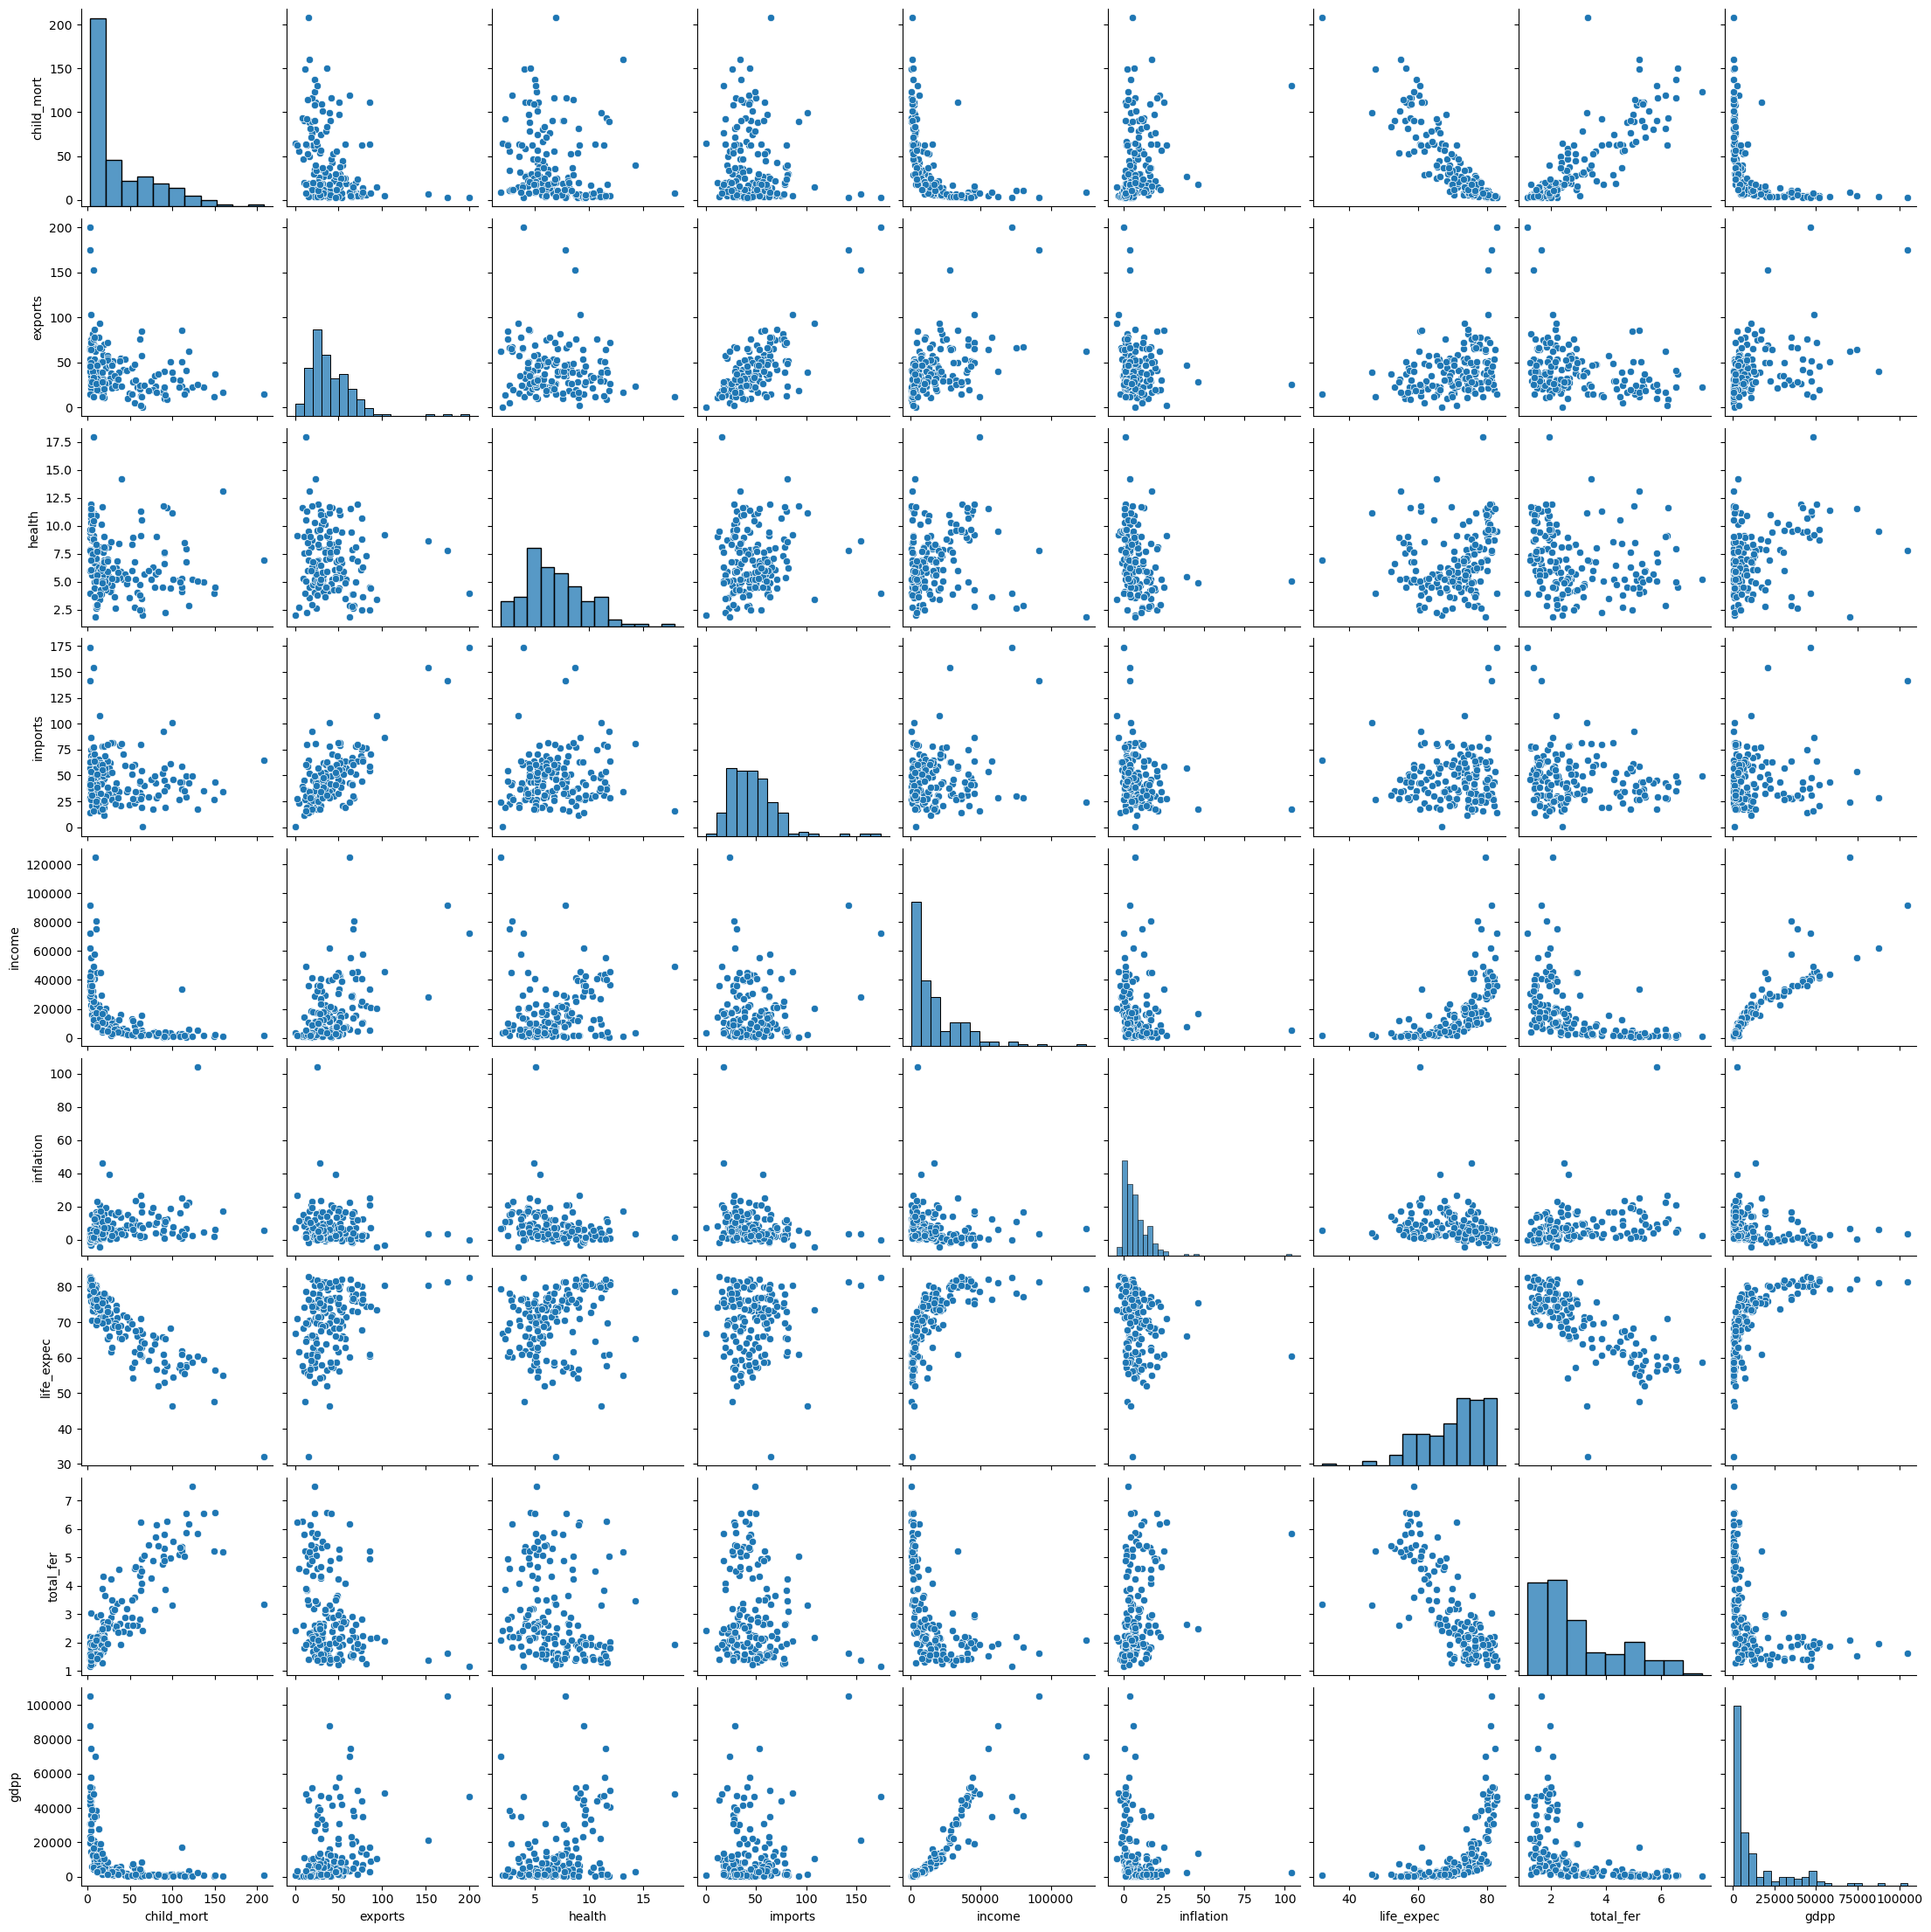

In [5]:
sns.pairplot(ratio_df)

In [11]:
corr_df = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']].corr()

<Axes: >

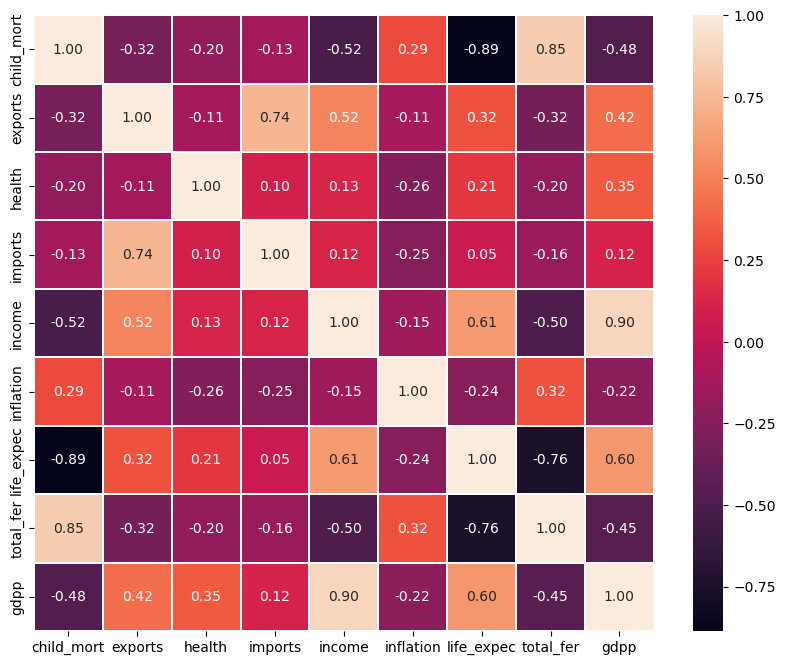

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    linewidths=0.1,
)


- 아동 사망률(child_mort)가 증가할 수록 각 여성당 출산될 아이의 수(total_fer)는 증가하고 신생아 평균 수명(life_expec)과 1인당 gdp(gdpp)는 줄어드는 것을 알 수 있다.
- 총 건강 지출(health)가 증가할 수록 1인당 gdp(gdpp)도 증가하는 것을 알 수 있다. 부유할 수록 건강에 돈을 더 많이 투자하는건 이치 아닌가요!? 가지고 있는 돈을 오래 지키려면 건강해야죠⍨
- 소득이 증가할 수록 신생아 평균 수명과 1인당 gdp는 증가하지만 출생률은 감소한다.
- 1인당 gdp가 증가하면 신생아 평균 수명은 같이 증가하지만 출생률과 아동 사망률은 감소하는 것을 확인할 수 있다.

In [10]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


#### 각 요소들 시각화

<Axes: xlabel='child_mort', ylabel='Count'>

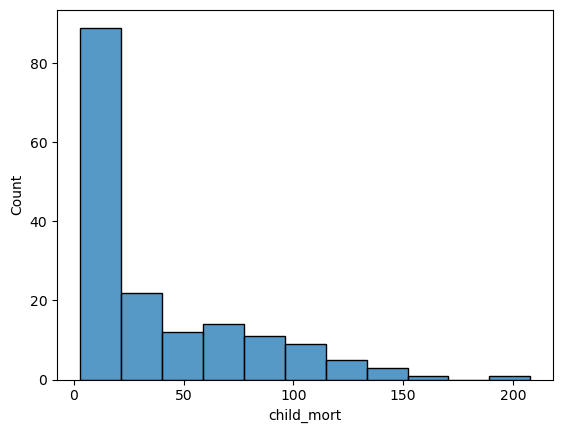

In [95]:
sns.histplot(data=df, x="child_mort")

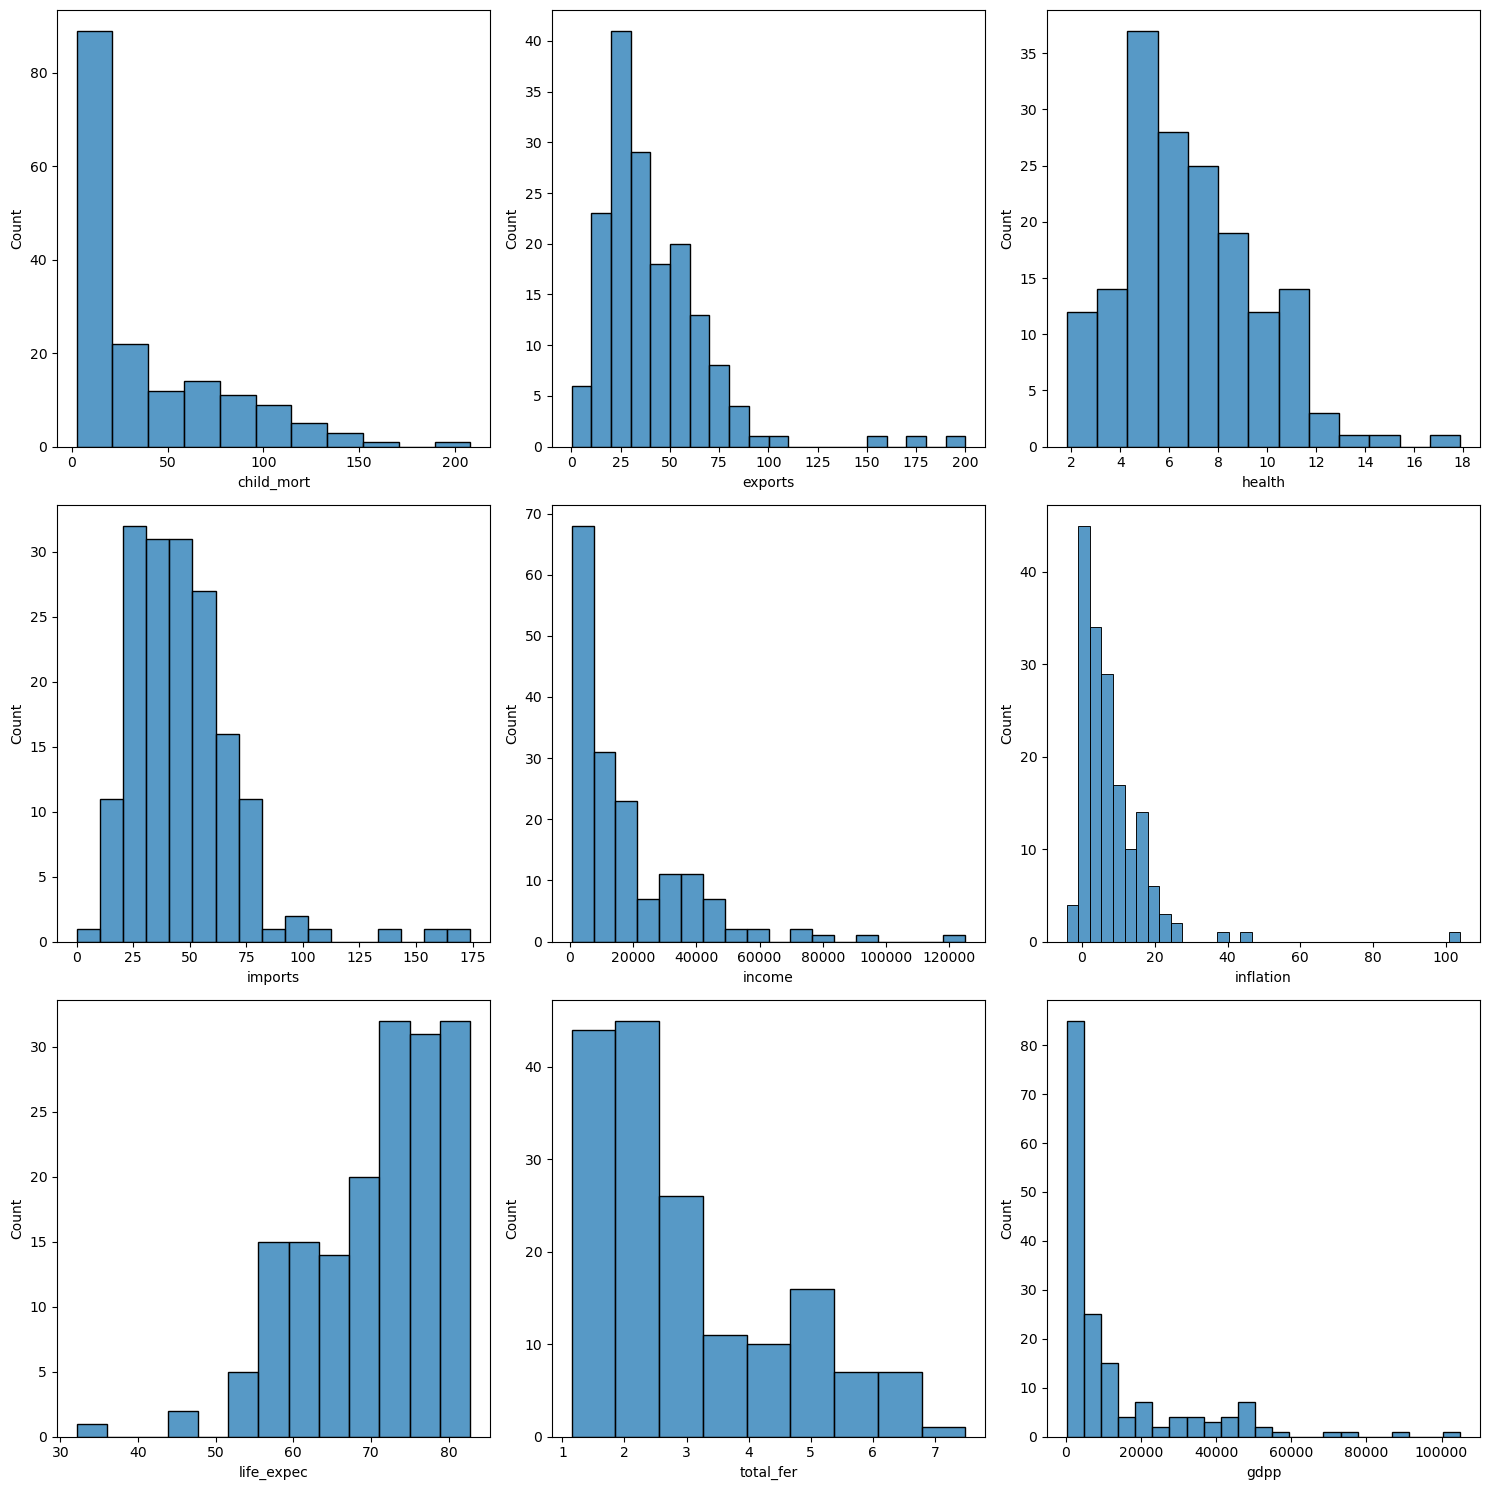

In [6]:
columns_of_interest = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, column in enumerate(columns_of_interest):
    row_index = i // 3
    col_index = i % 3
    sns.histplot(data=df, x=column, ax=axes[row_index, col_index])
    # df.groupby("continent")[column].mean().plot(kind="bar", ax=axes[row_index, col_index])
    # axes[row_index, col_index].set_ylabel(f'{column}')

plt.tight_layout()
plt.show()

### 이상값 정리 -> standard scailing (어라 이게 아닌가..? log를 취해줬어야 했나..?)

In [206]:
st_df = df[:]

In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_of_interest = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
st_df[columns_of_interest] = scaler.fit_transform(df[columns_of_interest])

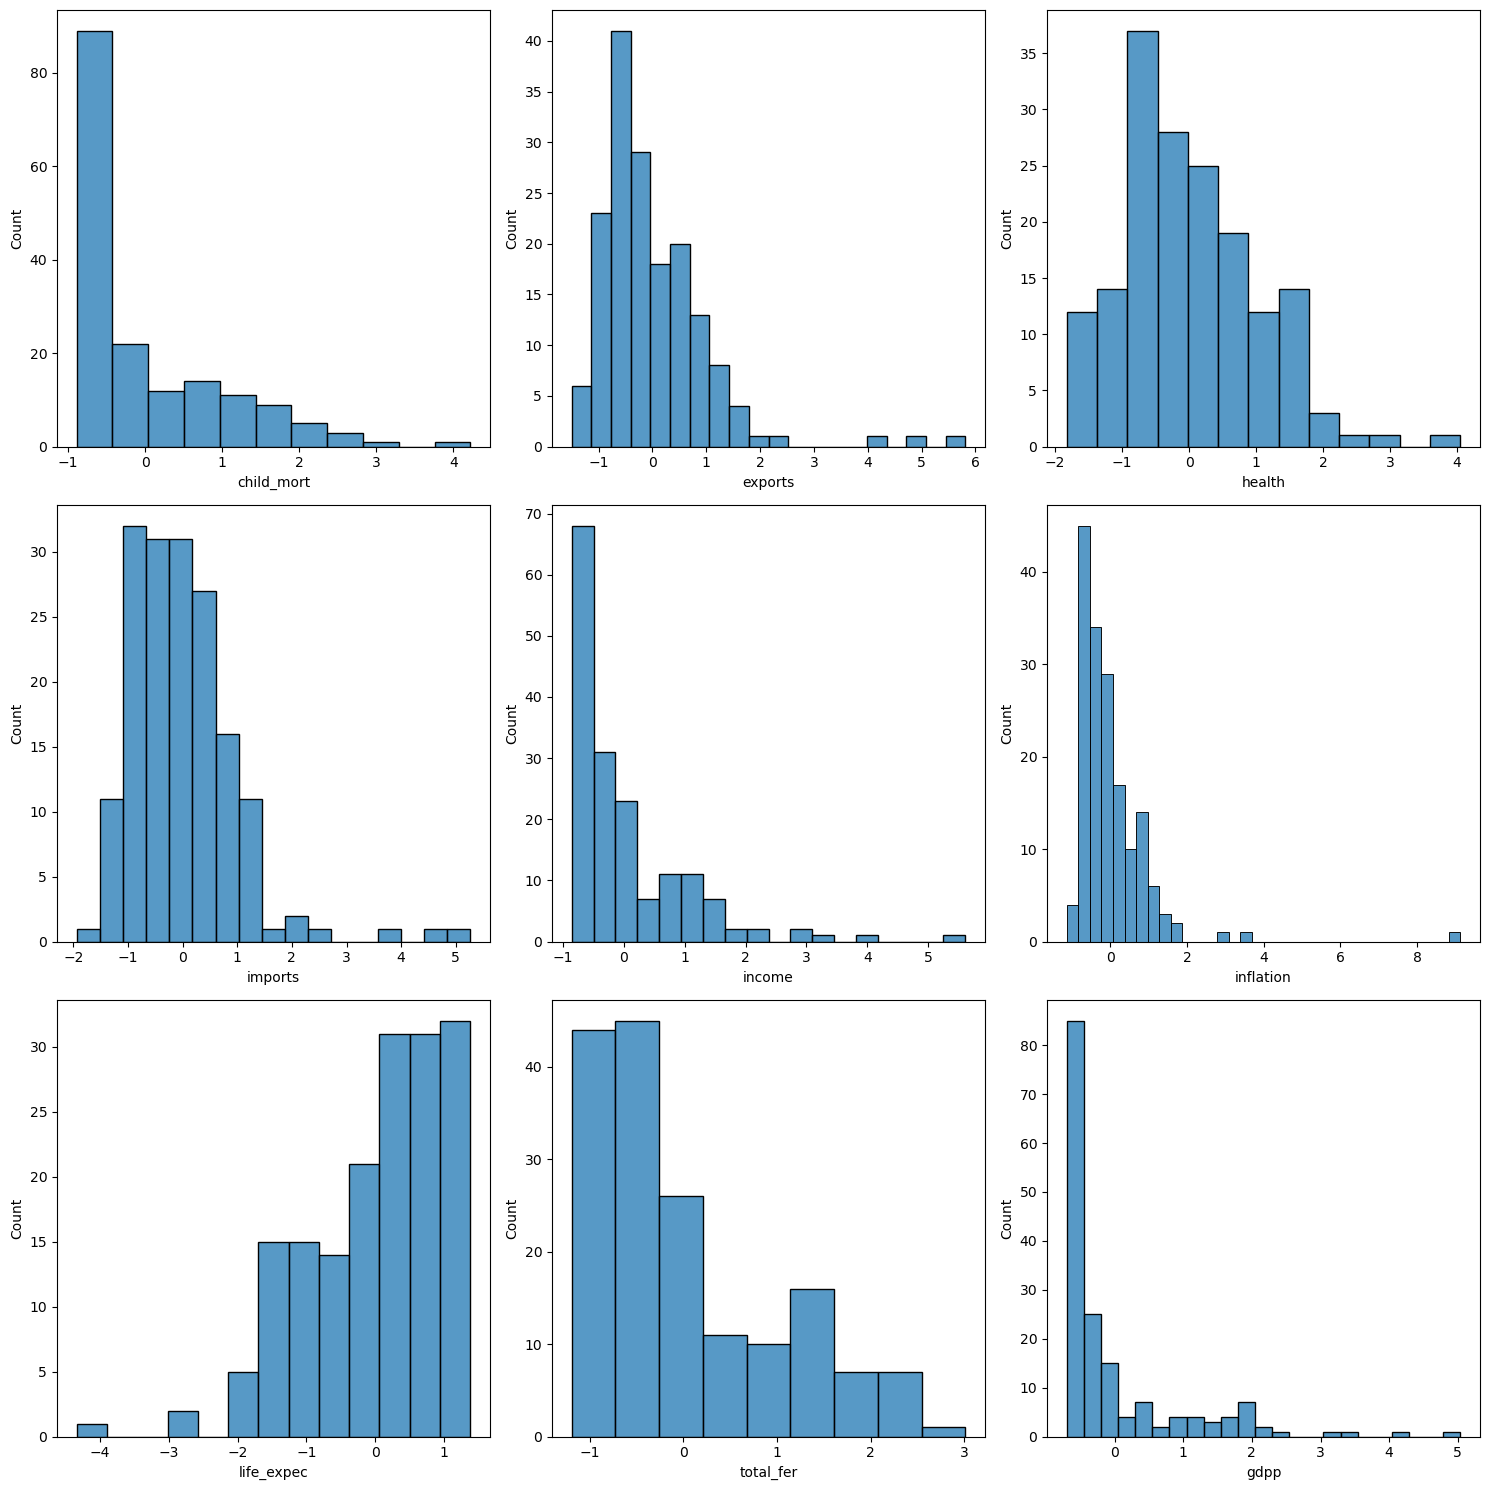

In [199]:
columns_of_interest = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, column in enumerate(columns_of_interest):
    row_index = i // 3
    col_index = i % 3
    sns.histplot(data=st_df, x=column, ax=axes[row_index, col_index])
    # df.groupby("continent")[column].mean().plot(kind="bar", ax=axes[row_index, col_index])
    # axes[row_index, col_index].set_ylabel(f'{column}')

plt.tight_layout()
plt.show()

### log -> 데이터 분포 완만하게

In [14]:
log_df = df[:]

In [15]:
import numpy as np

columns_of_interest = ['child_mort', 'income', 'inflation', 'total_fer', 'gdpp']

for i, column in enumerate(columns_of_interest):
    log_df[column] = np.log(df[column])

/Users/oyujeong/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# columns_of_interest = ['exports', 'health', 'imports', 'life_expec']
# log_df[columns_of_interest] = scaler.fit_transform(df[columns_of_interest])

In [16]:
log_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude
0,Afghanistan,4.502029,10.0,7.58,44.9,7.383989,2.244956,56.2,1.761300,6.315358,Southern Asia,NaN,Asia,33.939110,67.709953
1,Albania,2.809403,28.0,6.55,48.6,9.203316,1.501853,76.3,0.500775,8.316300,Southern Europe,NaN,Europe,41.153332,20.168331
2,Algeria,3.306887,38.4,4.17,31.4,9.464983,2.778819,76.5,1.061257,8.402904,Northern Africa,NaN,Africa,28.033886,1.659626
3,Angola,4.779123,62.3,2.85,42.9,8.682708,3.109061,60.1,1.818077,8.169053,Middle Africa,Sub-Saharan Africa,Africa,-11.202692,17.873887
4,Antigua and Barbuda,2.332144,45.5,6.03,58.9,9.857444,0.364643,76.8,0.756122,9.409191,Caribbean,Latin America and the Caribbean,North America,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,3.374169,46.6,5.25,52.7,7.989560,0.963174,63.0,1.252763,7.996317,Melanesia,NaN,Oceania,-15.376706,166.959158
163,Venezuela,2.839078,28.5,4.91,17.6,9.711116,3.826465,75.4,0.904218,9.510445,South America,Latin America and the Caribbean,South America,6.423750,-66.589730
164,Vietnam,3.148453,72.0,6.84,80.2,8.409608,2.493205,73.1,0.667829,7.177782,South-eastern Asia,NaN,Asia,14.058324,108.277199
165,Yemen,4.030695,30.0,5.18,34.4,8.407378,3.161247,67.5,1.541159,7.177782,Western Asia,NaN,Asia,15.552727,48.516388


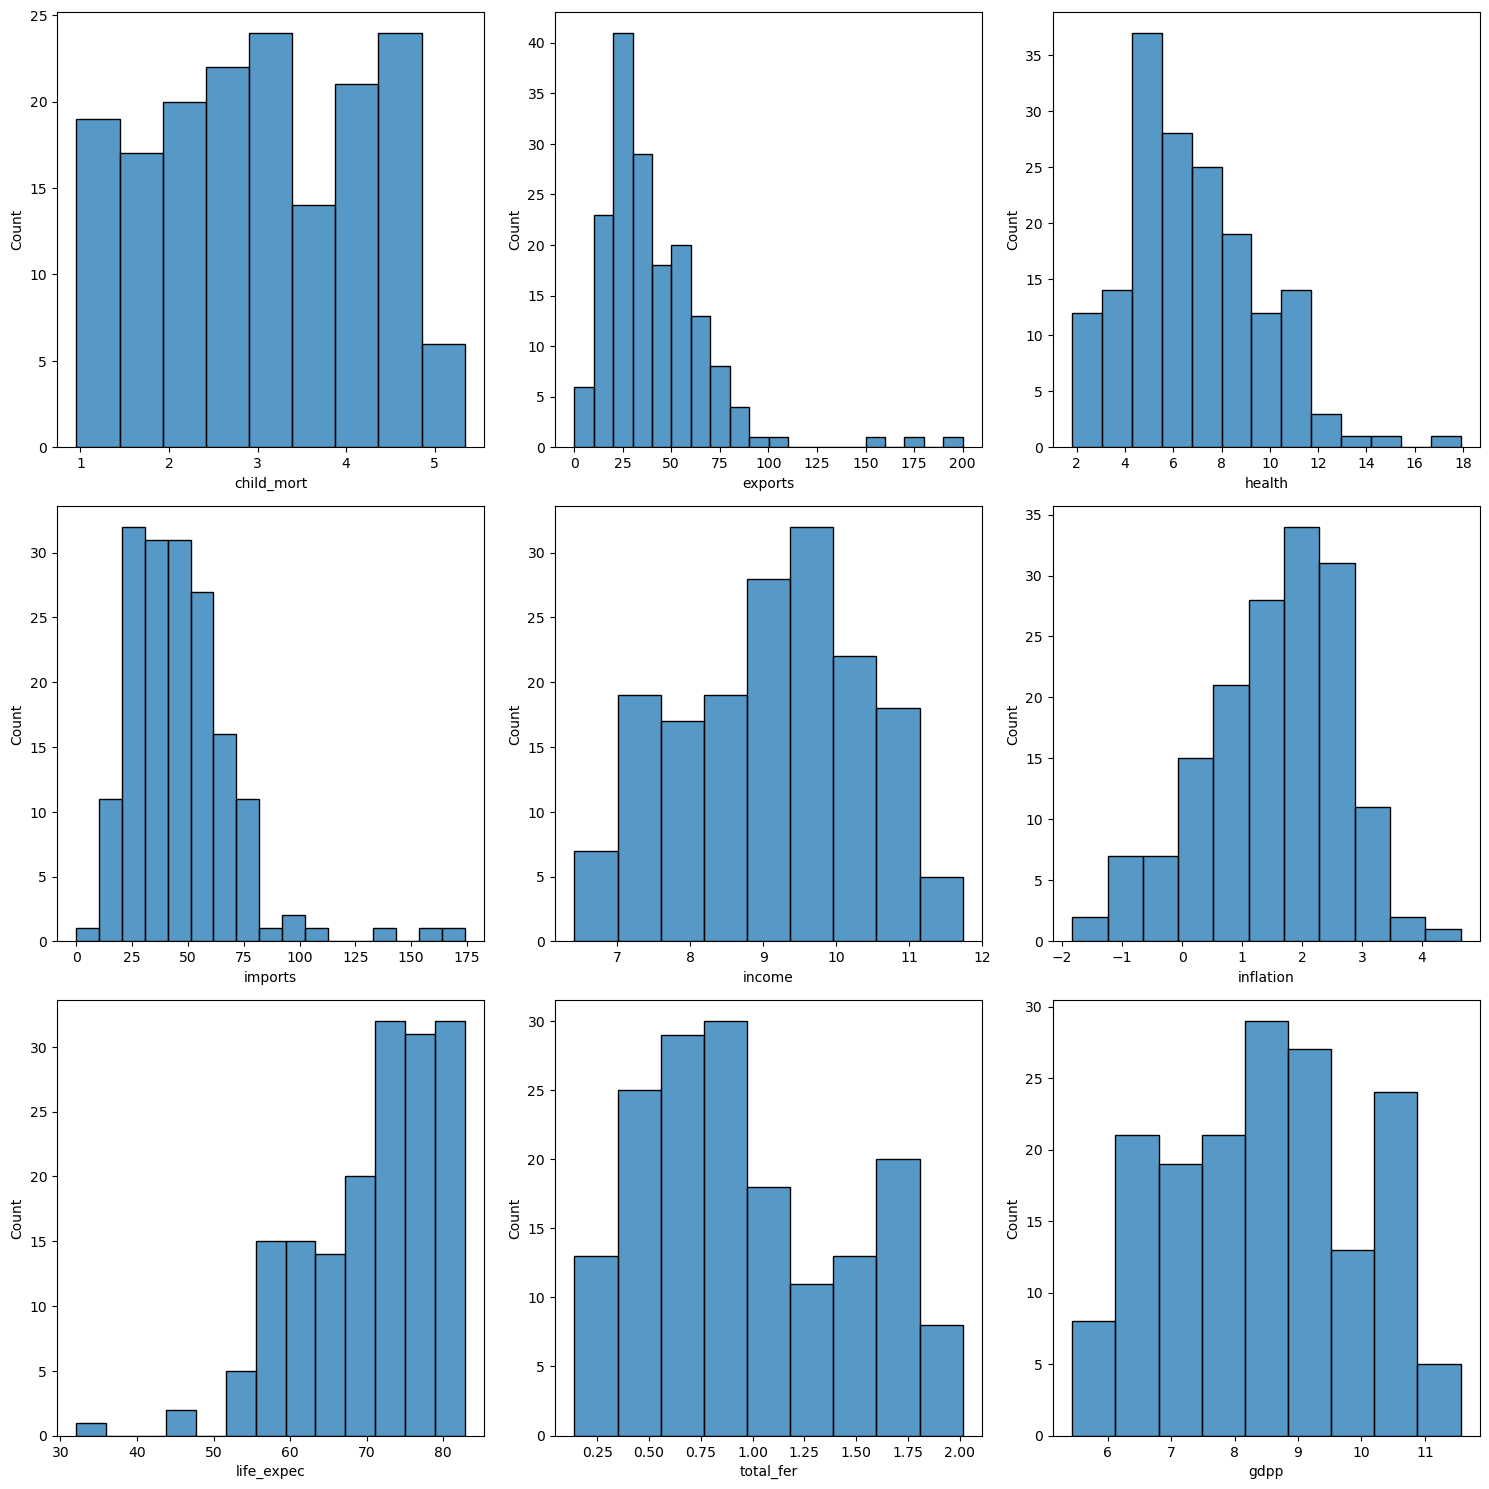

In [17]:
columns_of_interest = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, column in enumerate(columns_of_interest):
    row_index = i // 3
    col_index = i % 3
    sns.histplot(data=log_df, x=column, ax=axes[row_index, col_index])
    # df.groupby("continent")[column].mean().plot(kind="bar", ax=axes[row_index, col_index])
    # axes[row_index, col_index].set_ylabel(f'{column}')

plt.tight_layout()
plt.show()

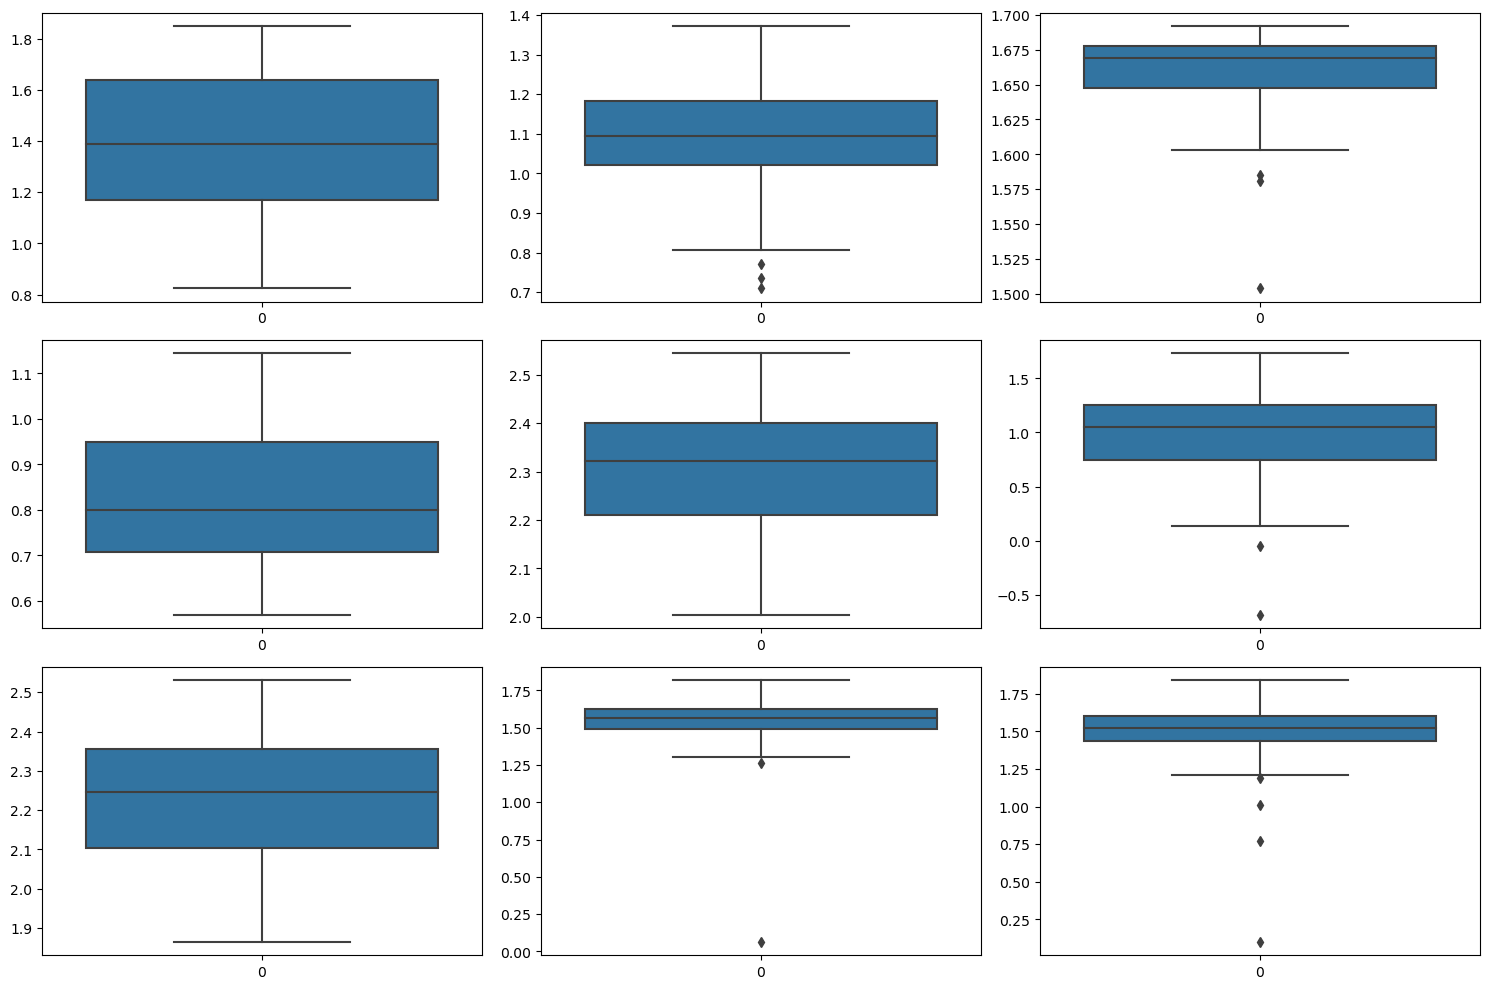

In [21]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.boxplot(log_df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(log_df['health'], ax = axs[0,1])
plt3 = sns.boxplot(log_df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(log_df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(log_df['income'], ax = axs[1,1])
plt6 = sns.boxplot(log_df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(log_df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(log_df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(log_df['exports'], ax = axs[2,2])

plt.tight_layout()

#### continent별 각 요소들의 평균

In [20]:
log_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'region_1', 'region_2',
       'continent', 'latitude', 'longitude'],
      dtype='object')

In [22]:
df.groupby("continent")["child_mort"].mean()

continent
Africa           82.155319
Asia             29.773333
Europe            6.184615
North America    30.020000
Oceania          25.711111
South America    22.258333
Name: child_mort, dtype: float64

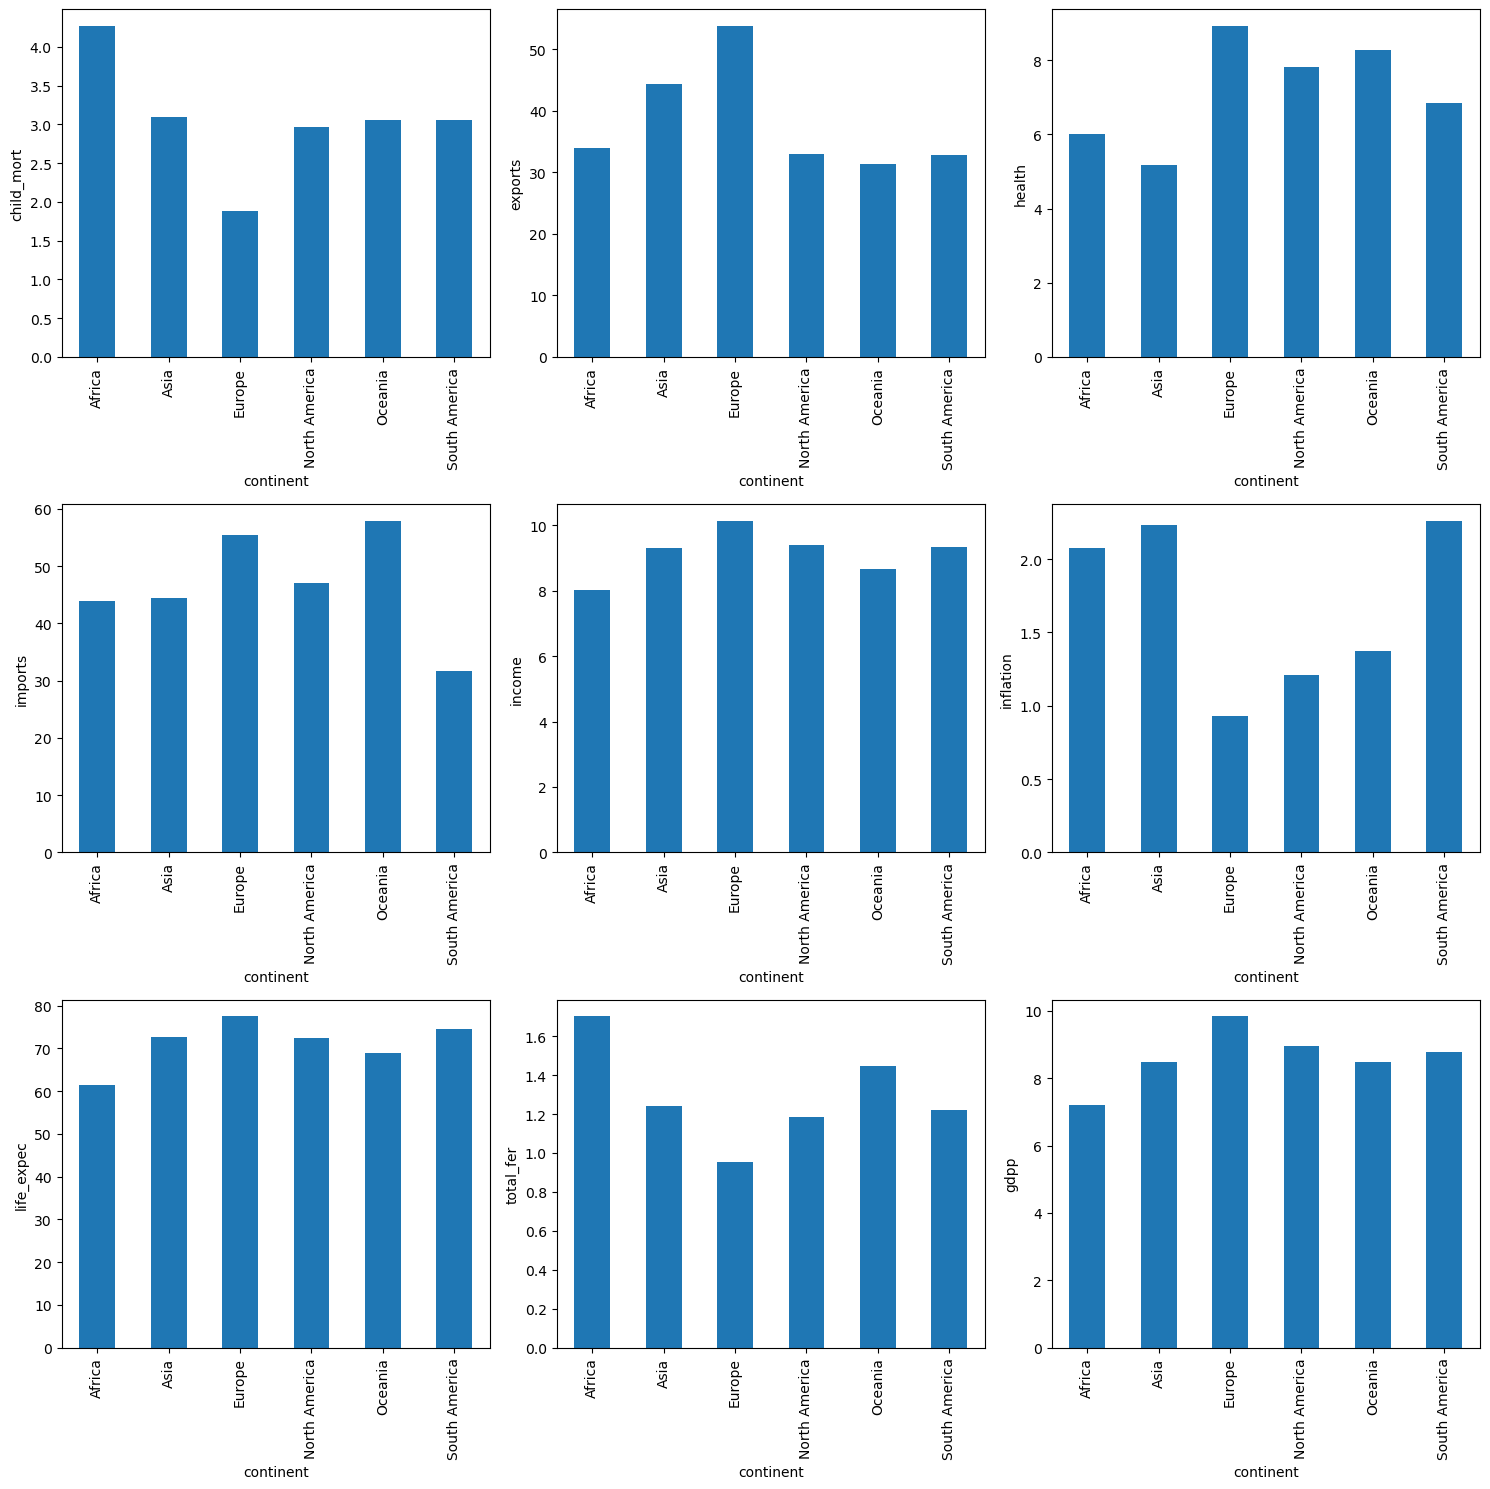

In [69]:
columns_of_interest = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, column in enumerate(columns_of_interest):
    row_index = i // 3
    col_index = i % 3
    log_df.groupby("continent")[column].mean().plot(kind="bar", ax=axes[row_index, col_index])
    axes[row_index, col_index].set_ylabel(f'{column}')

plt.tight_layout()
plt.show()

#### 각 요인별 하위 10개국

In [ ]:
columns_of_interest = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

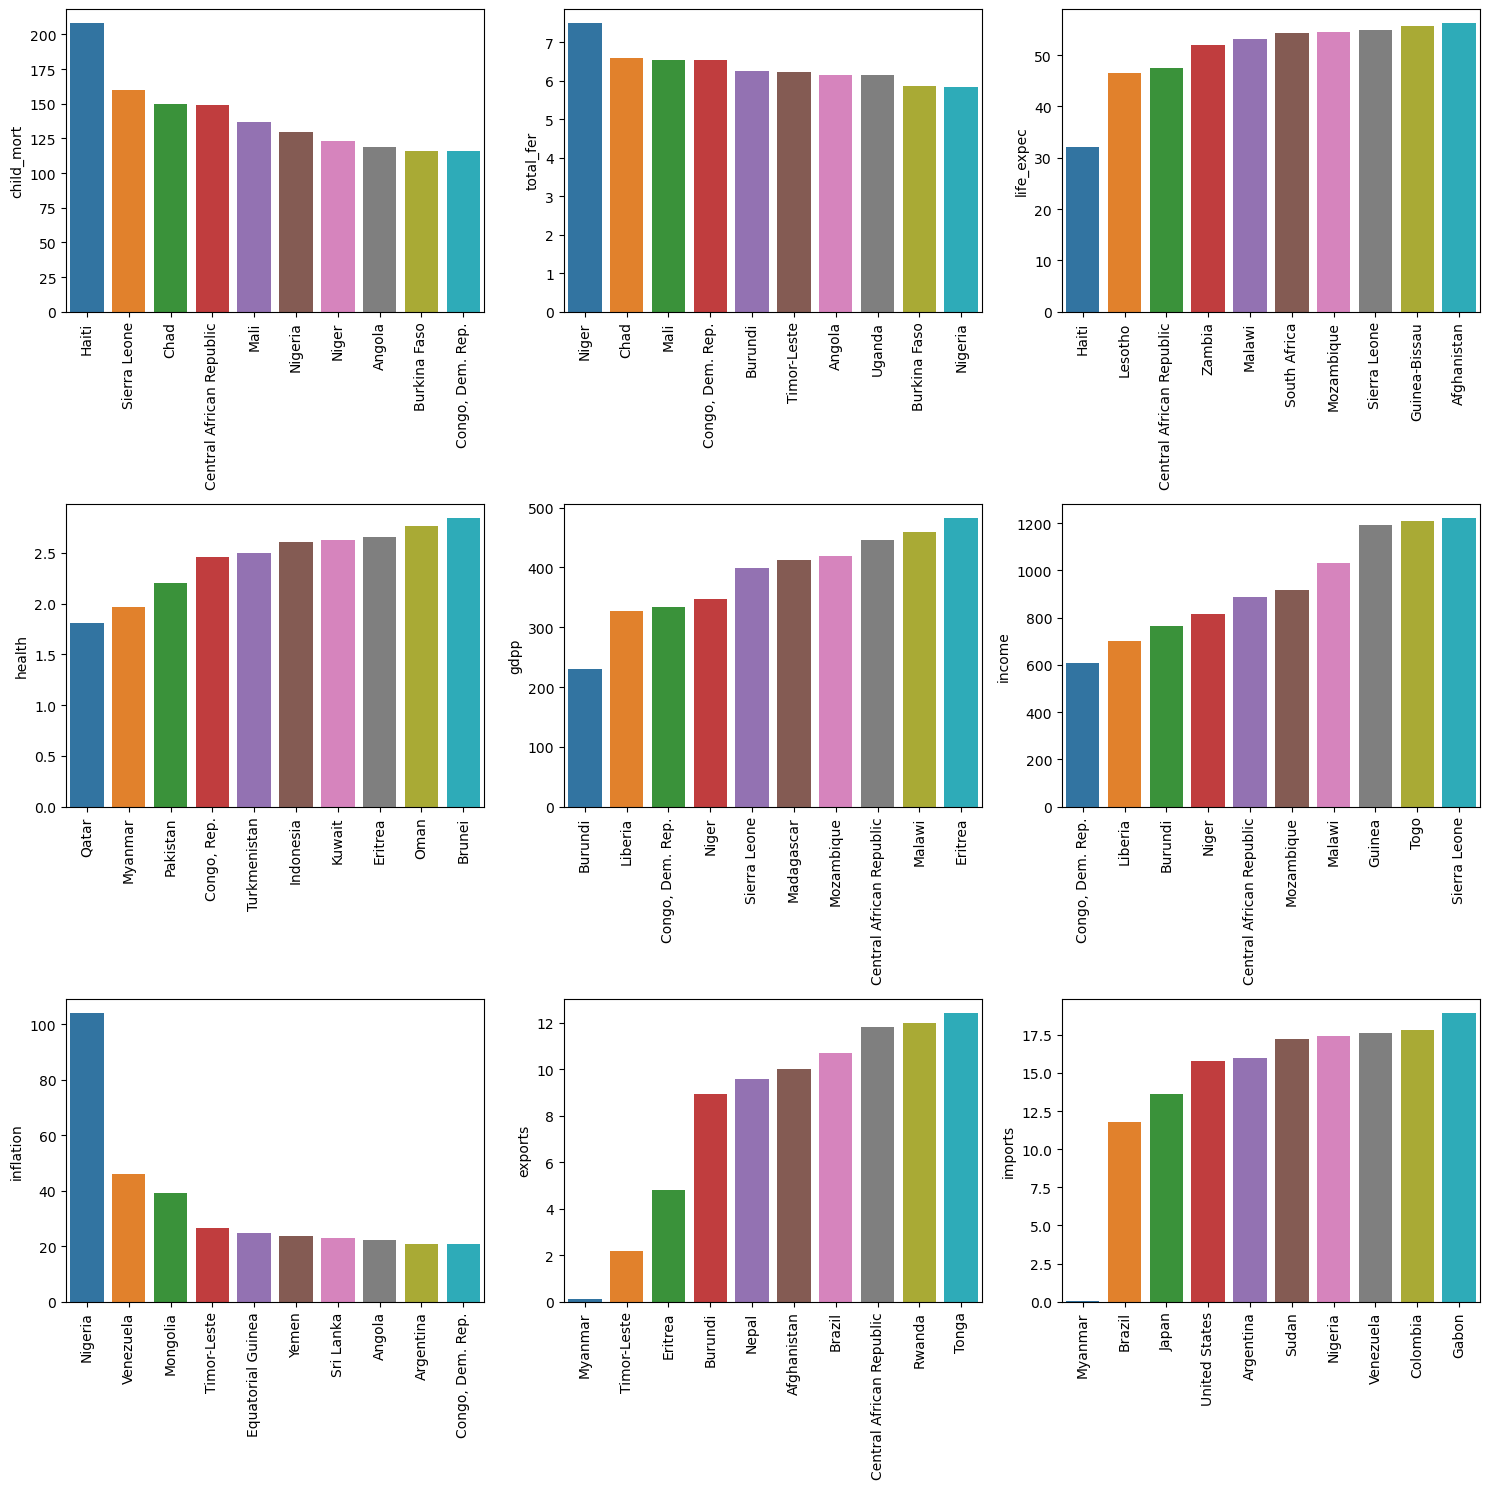

In [91]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'child_mort')

bottom10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'exports')

bottom10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'health')

bottom10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'imports')

bottom10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'income')

top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'inflation')

bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'life_expec')

top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'total_fer')

bottom10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'gdpp')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

### 계층적 군집 분석

In [5]:
df.iloc[:, 1:10]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


In [18]:
X = log_df.iloc[:, 1:10]

In [7]:
from scipy.cluster import hierarchy as hc

In [8]:
X = df.iloc[:, 1:10]

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
_ = hc.dendrogram(hc.linkage(X, method="ward"))
plt.axhline(300000, color="red", linestyle="--", label="num clusters: 2")
plt.axhline(150000, color="orange", linestyle="--", label="num clusters: 3")
plt.axhline(120000, color="green", linestyle="--", label="num clusters: 4")
plt.axhline(75000, color="blue", linestyle="--", label="num clusters: 5")
plt.axhline(60000, color="purple", linestyle="--", label="num clusters: 8")

plt.legend()

ValueError: The condensed distance matrix must contain only finite values.

<Figure size 1200x800 with 0 Axes>

### 실루엣 계수 -> 클러스터 개수 결정

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from tqdm.notebook import tqdm

In [11]:
silhouette_scores = []
for i in tqdm(range(2, 11)):
    silhouette_scores.append(
        silhouette_score(X, AgglomerativeClustering(n_clusters=i).fit_predict(X))
    )

  0%|          | 0/9 [00:00<?, ?it/s]

<BarContainer object of 9 artists>

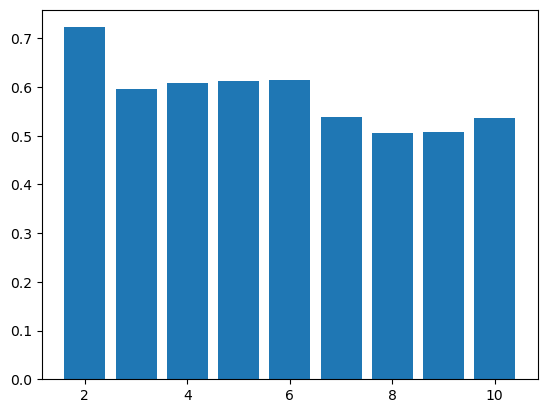

In [12]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(10, 8))
plt.bar(range(2, 11), silhouette_scores)

In [13]:
silhouette_scores

# 2개 아니면 6개인데... 군집 2개는 너무 적지 않나?
# >> 일단 2개 해보자~

[0.7228222144066916,
 0.5963166959187518,
 0.6085546614369761,
 0.6130870942691207,
 0.6151254641783359,
 0.5387570178171449,
 0.5062825669377131,
 0.5083399607219967,
 0.5375197533903955]

### 계층적 군집 모델 학습 (군집: 2)

In [83]:
# 클러스터 개수 = 2

model = AgglomerativeClustering(
    n_clusters=2,     # 군집 개수 = 2
    affinity="euclidean",     # 거리 계산 = 유클리디안
    linkage="ward"    # 연결 방법 = 와드
)
df["label"] = model.fit_predict(X)

/Users/oyujeong/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Southern Asia,NaN,Asia,33.939110,67.709953,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,NaN,Europe,41.153332,20.168331,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,NaN,Africa,28.033886,1.659626,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Sub-Saharan Africa,Africa,-11.202692,17.873887,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Caribbean,Latin America and the Caribbean,North America,17.060816,-61.796428,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Melanesia,NaN,Oceania,-15.376706,166.959158,0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0,South America,Latin America and the Caribbean,South America,6.423750,-66.589730,0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,South-eastern Asia,NaN,Asia,14.058324,108.277199,0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,Western Asia,NaN,Asia,15.552727,48.516388,0


In [17]:
df.groupby("label")[["country"]].count()

,country
label,
0,143
1,24


In [18]:
df.groupby("label")["child_mort"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,143.0,43.847552,41.016877,3.2,13.5,26.10,63.8,208.0
1,24.0,5.037500,2.408646,2.6,3.2,4.25,5.3,10.8


<Axes: xlabel='label', ylabel='health'>

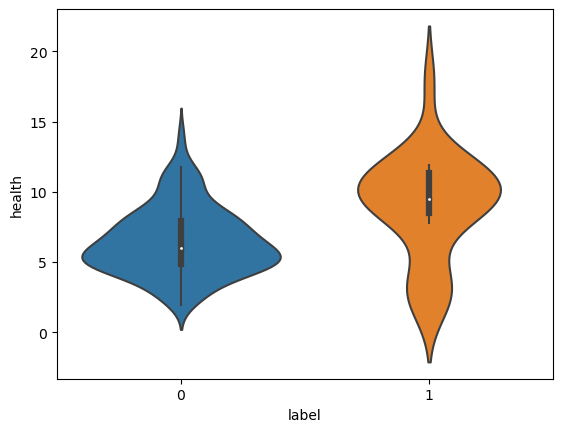

In [25]:
sns.violinplot(
    data=df,
    x="label",
    y="health"
)

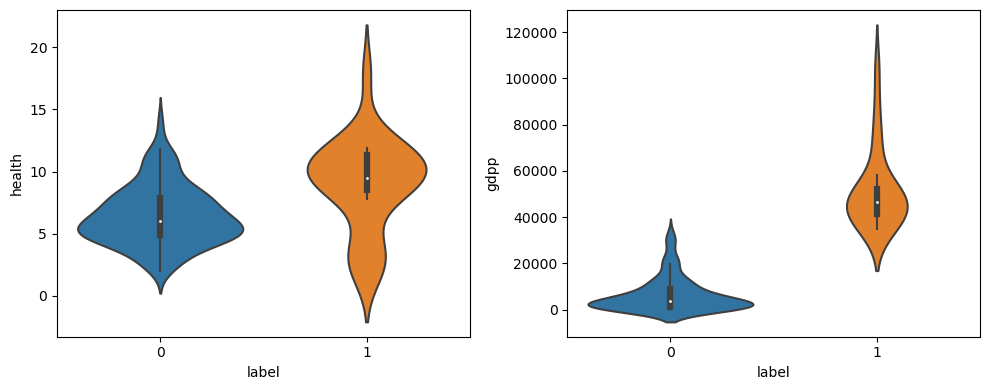

In [46]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

plt1 = sns.violinplot(data=df, x="label", y="health", ax=axes[0])
plt2 = sns.violinplot(data=df,x="label",y="gdpp",ax=axes[1])

plt.tight_layout()
plt.show()

health(총 건강 지출 비용)
- 군집1이 0에 비해 넓게 분포하고 몰려있는 부분이 높게 위치해 있다. -> 

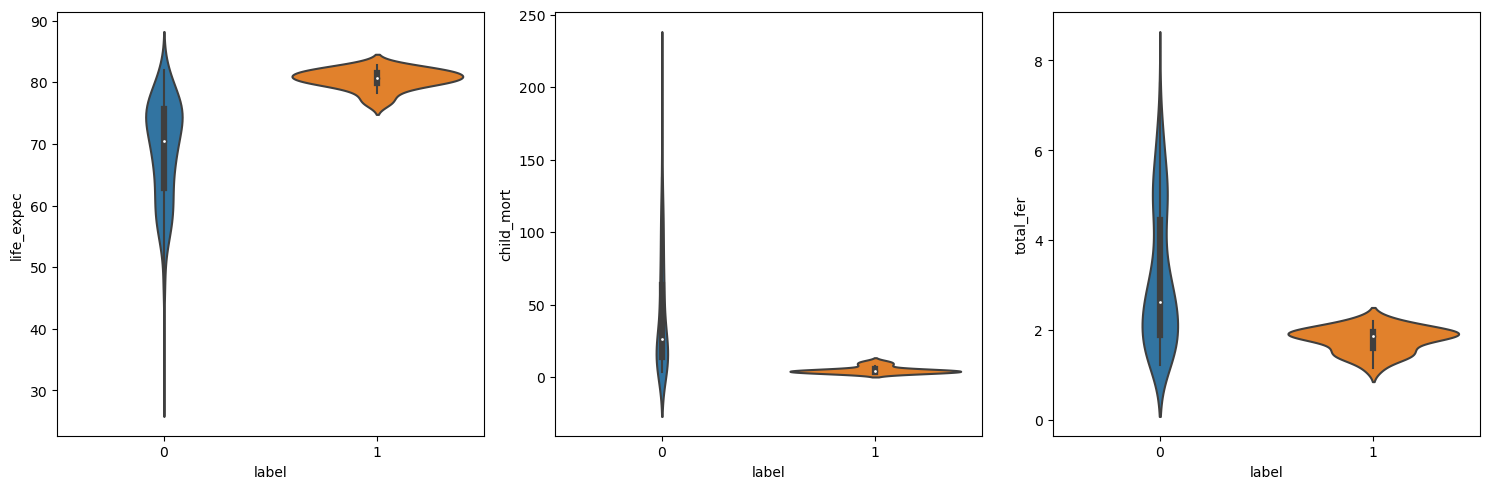

In [41]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

plt1 = sns.violinplot(data=df, x="label", y="life_expec", ax=axes[0])
plt2 = sns.violinplot(data=df,x="label",y="child_mort",ax=axes[1])
plt2 = sns.violinplot(data=df,x="label",y="total_fer",ax=axes[2])

plt.tight_layout()
plt.show()

<Axes: xlabel='continent'>

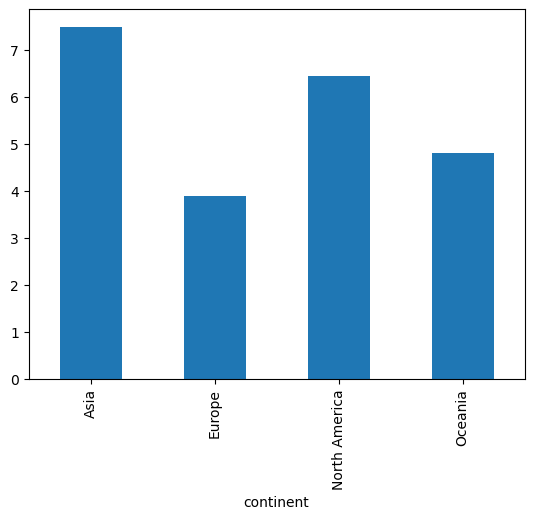

In [24]:
df[df["label"]==1].groupby("continent")["child_mort"].mean().plot(kind="bar")

<Axes: xlabel='continent'>

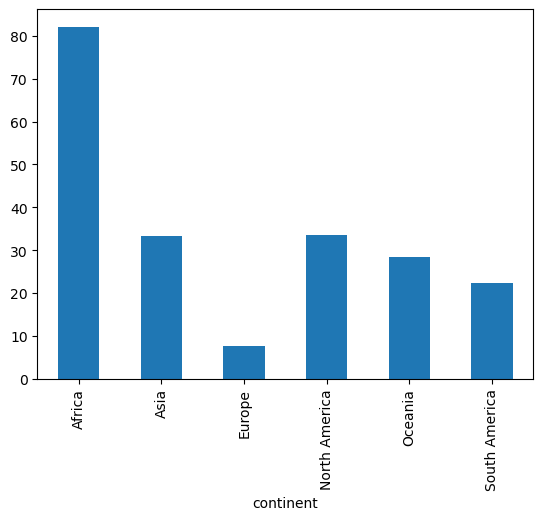

In [23]:
df[df["label"]==0].groupby("continent")["child_mort"].mean().plot(kind="bar")

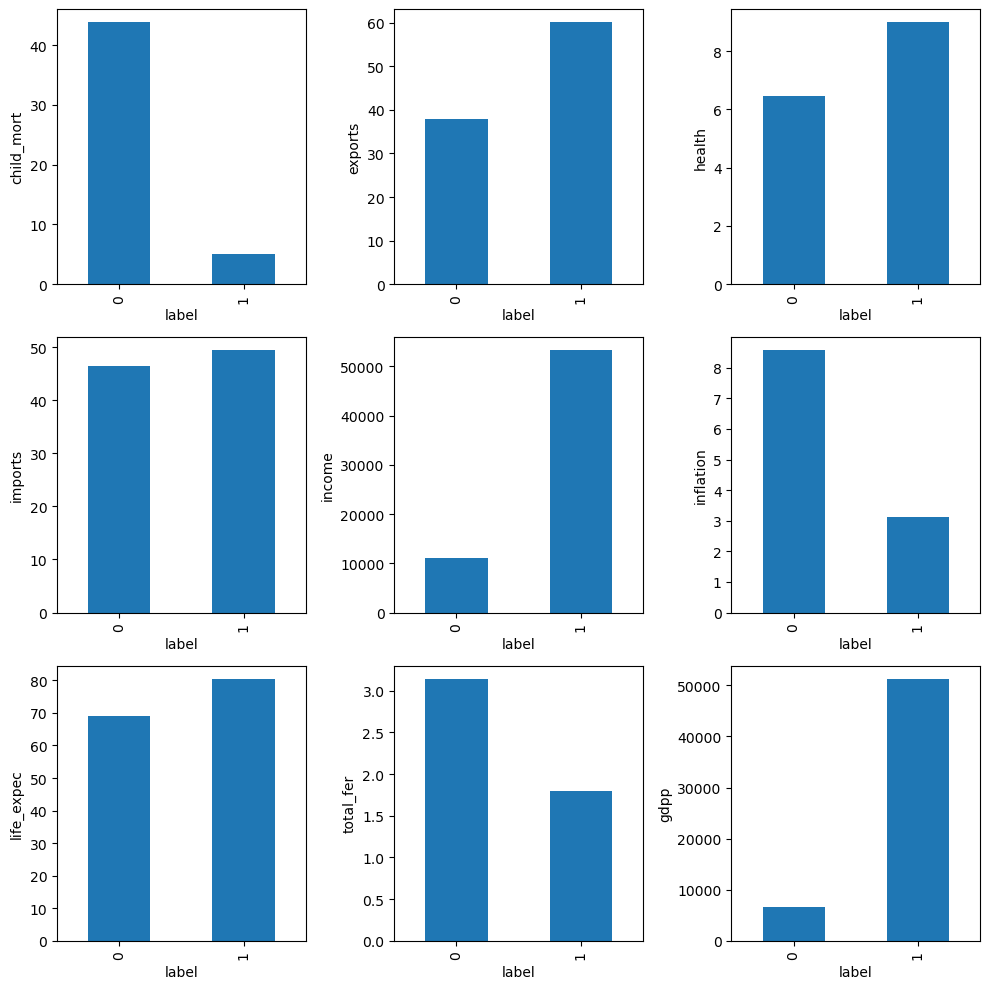

In [49]:
columns_of_interest = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, column in enumerate(columns_of_interest):
    row_index = i // 3
    col_index = i % 3
    df.groupby("label")[column].mean().plot(kind="bar", ax=axes[row_index, col_index])
    axes[row_index, col_index].set_ylabel(f'{column}')

plt.tight_layout()
plt.show()

In [88]:
df.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Southern Asia,NaN,Asia,33.939110,67.709953,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,NaN,Europe,41.153332,20.168331,0


In [109]:
df[df["label"]==1]["country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Denmark',
       'Finland', 'France', 'Germany', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Kuwait', 'Luxembourg', 'Netherlands', 'Norway', 'Qatar',
       'Singapore', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'], dtype=object)

In [102]:
df[df["label"]==1][["country", "continent"]]

,country,continent
7,Australia,Oceania
8,Austria,Europe
15,Belgium,Europe
23,Brunei,Asia
29,Canada,North America
44,Denmark,Europe
53,Finland,Europe
54,France,Europe
58,Germany,Europe
68,Iceland,Europe


In [104]:
df[df["country"]=="South Korea"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude,label
138,South Korea,4.1,49.4,6.93,46.2,30400.0,3.16,80.1,1.23,22100.0,Eastern Asia,NaN,Asia,35.907757,127.766922,0


In [112]:
df[df["country"]=="Japan"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude,label
77,Japan,3.2,15.0,9.49,13.6,35800.0,-1.9,82.8,1.39,44500.0,Eastern Asia,NaN,Asia,36.204824,138.252924,1
